In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

# question 1

In [2]:
max_temp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]


Text(0, 0.5, 'Min. and max. Temperature')

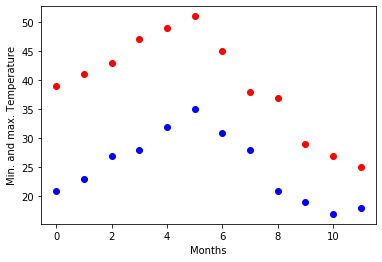

In [3]:
np_max = np.array(max_temp)
np_min = np.array(min_temp)
months_in_year = np.arange(12)
plt.plot(months_in_year,np_max,'ro')
plt.plot(months_in_year,np_min, 'bo')
plt.xlabel("Months")
plt.ylabel("Min. and max. Temperature")


In [4]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi /times.max()))


In [5]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months_in_year,np_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months_in_year,np_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

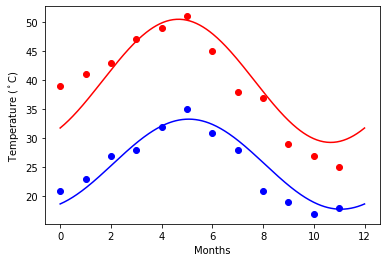

In [6]:
plt.plot(months_in_year, np_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months_in_year, np_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')
plt.show()

# question 2

In [239]:
df=pd.read_csv(r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [289]:
#df.head(3)
df['index']=0
for i in range(0,len(df)):
    df['index'][i]=i
df.head(3)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,index
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2


In [241]:
df.sex.unique()


array(['female', 'male', nan], dtype=object)

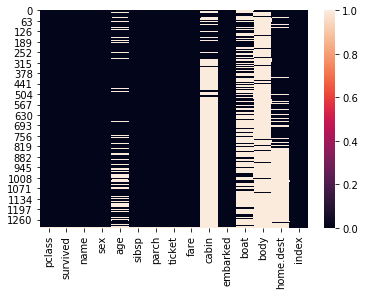

In [242]:
sns.heatmap(df.isnull())

In [243]:
df.sex.isnull().value_counts()

False    1309
True        1
Name: sex, dtype: int64

In [244]:
df.sex.mode()

0    male
dtype: object

In [245]:
df.sex=df.sex.fillna(df.sex.mode())

In [246]:
df.sex.isnull().value_counts()

False    1309
True        1
Name: sex, dtype: int64

In [247]:
df.age=df.age.fillna(df.age.mean())

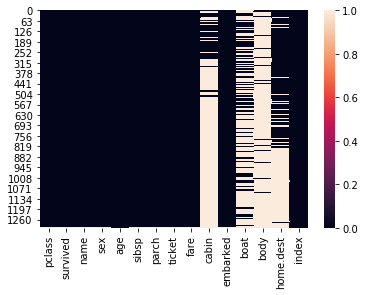

In [248]:
sns.heatmap(df.isnull())

([<matplotlib.patches.Wedge at 0x29b6d070>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939718, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.400303%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.599694%')])

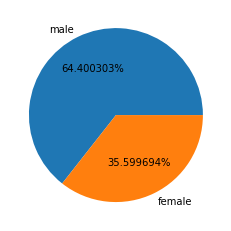

In [249]:
count=df['sex'].value_counts()
plt.pie(count.values,labels=['male','female'],autopct='%f%%')

In [250]:
count.values.tolist()

[843, 466]

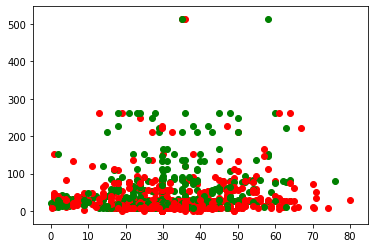

In [285]:
for i in range(0,len(df)):
    if(df['sex'][i]=='female'):
        plt.scatter(df['age'][i],df['fare'][i],c='g')
    if(df['sex'][i]=='male'):
        plt.scatter(df['age'][i],df['fare'][i],c='r')

In [287]:
color = ['r' if i=='male' else 'b' for i in df.sex]

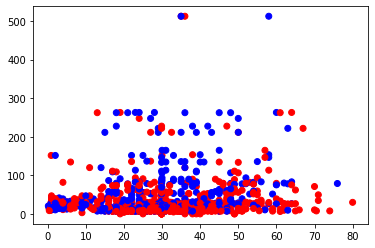

In [288]:
plt.scatter(df.age,df.fare,c=color )